In [1]:
import numpy as np
import pandas as pd

In [2]:
trans = pd.DataFrame({
    "A": [12, 4, 5, None, 1],
    "B": [7, 2, 54, 3, None],
    "C": [20, 16, 11, 3, 8],
    "D": [14, 3, None, 2, 6]
}, index=['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'])

trans


,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [3]:
result = trans.transform(lambda x : x + 10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [4]:
x = np.random.randint(10, 200, size=10)
x

array([119, 134,  85, 186, 117,  21, 114, 123, 107, 153])

In [5]:
np.digitize(x, bins=[50])

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [6]:
np.digitize(x, bins=[50, 100])

array([2, 2, 1, 2, 2, 0, 2, 2, 2, 2])

In [7]:
df = pd.DataFrame({"height": x})
df

,height
0,119
1,134
2,85
3,186
4,117
5,21
6,114
7,123
8,107
9,153


In [8]:
df['binned'] = pd.cut(x=df['height'], bins=[0, 25, 50, 100, 200])
df

,height,binned
0,119,"(100, 200]"
1,134,"(100, 200]"
2,85,"(50, 100]"
3,186,"(100, 200]"
4,117,"(100, 200]"
5,21,"(0, 25]"
6,114,"(100, 200]"
7,123,"(100, 200]"
8,107,"(100, 200]"
9,153,"(100, 200]"


In [9]:
df['bin_label'] = pd.cut(x=df['height'],
                         bins=[0, 25, 50, 100, 200],
                         labels=[1, 2, 3, 4])

df


,height,binned,bin_label
0,119,"(100, 200]",4
1,134,"(100, 200]",4
2,85,"(50, 100]",3
3,186,"(100, 200]",4
4,117,"(100, 200]",4
5,21,"(0, 25]",1
6,114,"(100, 200]",4
7,123,"(100, 200]",4
8,107,"(100, 200]",4
9,153,"(100, 200]",4


In [10]:
pd.qcut(df['height'], q=5)

0     (115.8, 120.6]
1     (120.6, 137.8]
2    (20.999, 102.6]
3     (137.8, 186.0]
4     (115.8, 120.6]
5    (20.999, 102.6]
6     (102.6, 115.8]
7     (120.6, 137.8]
8     (102.6, 115.8]
9     (137.8, 186.0]
Name: height, dtype: category
Categories (5, interval[float64, right]): [(20.999, 102.6] < (102.6, 115.8] < (115.8, 120.6] < (120.6, 137.8] < (137.8, 186.0]]

In [11]:
degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]

student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)

student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)

honor = pd.DataFrame({'grades': student_results,
                      'honors': student_results_degrees})

honor


,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


<Axes: >

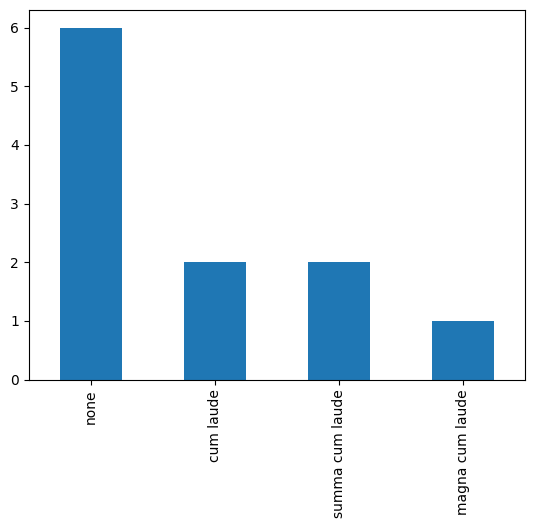

In [15]:
pd.Series(student_results_degrees).value_counts().plot.bar()

In [16]:
  pd.Series(student_results_degrees)

0     summa cum laude
1     summa cum laude
2     magna cum laude
3           cum laude
4           cum laude
5                none
6                none
7                none
8                none
9                none
10               none
dtype: category
Categories (4, object): ['none' < 'cum laude' < 'magna cum laude' < 'summa cum laude']